In [69]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl

In [70]:
df = pd.read_csv("data_v6.csv")
startdates = pd.to_datetime(df["StartDate"], format='%Y-%m-%d')

In [71]:
# Remove 5% outliers for both Registered Capital and Number of Employees
df_rem = df.copy()
df_rem = df[(df["NumEmployees"] < df["NumEmployees"].quantile(0.95)) & (df["RegisteredCapital"] < df["RegisteredCapital"].quantile(0.95))]

In [72]:
# How many outliers removed
outliers = len(df) - len(df_rem)
print("Removed rows: ", outliers)

Removed rows:  201


In [73]:
df.keys()

Index(['Name', 'CVR', 'BusinessAddress', 'StartDate', 'Status', 'IndustryCode',
       'IndustryName', 'Area', 'AreaCode', 'NumEmployees', 'DirectorName',
       'DirectorAddress', 'DirectorId', 'RegisteredCapital',
       'RegisteredCapitalCurrency', 'NumPeople', 'NumCars',
       'DistanceToBusinessMeters', 'DistanceToBusinessDriveSeconds',
       'DirectorAddressLatitude', 'DirectorAddressLongitude ',
       'BusinessAddressLatitude', 'BusinessAddressLongitude', 'StartYear',
       'StartDecade', 'IndustryShortCode', 'IndustryGroup'],
      dtype='object')

# Hexagon Plots

In [74]:
# Create df_norm compy from df
df_norm = df_rem.copy()

# Create a column with the sum of the number of people and number of cars close to director address (called "NumPeopleCars") and z-score it
df_norm["NumPeopleCars"] = (df["NumPeople"] + df["NumCars"] - df["NumPeople"].mean() - df["NumCars"].mean()) / (df["NumPeople"].std() + df["NumCars"].std())

# Z-score NumPeople, NumCars, NumEmployees, and RegisteredCapital
df_norm["NumPeople"] = (df["NumPeople"] - df["NumPeople"].mean()) / df["NumPeople"].std()
df_norm["NumCars"] = (df["NumCars"] - df["NumCars"].mean()) / df["NumCars"].std()
df_norm["NumEmployees"] = (df["NumEmployees"] - df["NumEmployees"].mean()) / df["NumEmployees"].std()
df_norm["RegisteredCapital"] = (df["RegisteredCapital"] - df["RegisteredCapital"].mean()) / df["RegisteredCapital"].std()
df_norm["NumPeopleCars"] = (df["NumPeople"] + df["NumCars"] - df["NumPeople"].mean() - df["NumCars"].mean()) / (df["NumPeople"].std() + df["NumCars"].std())


# Remove all rows where z-scored values are > 3 or < -3
df_norm = df_norm[(df_norm.NumPeople < 3) & (df_norm.NumPeople > -3)]
df_norm = df_norm[(df_norm.NumCars < 3) & (df_norm.NumCars > -3)]
df_norm = df_norm[(df_norm.NumEmployees < 3) & (df_norm.NumEmployees > -3)]
df_norm = df_norm[(df_norm.RegisteredCapital < 3) & (df_norm.RegisteredCapital > -3)]
df_norm = df_norm[(df_norm.NumPeopleCars < 3) & (df_norm.NumPeopleCars > -3)]
df_norm = df_norm[(df_norm.NumPeopleCars < 3) & (df_norm.NumPeopleCars > -3)]


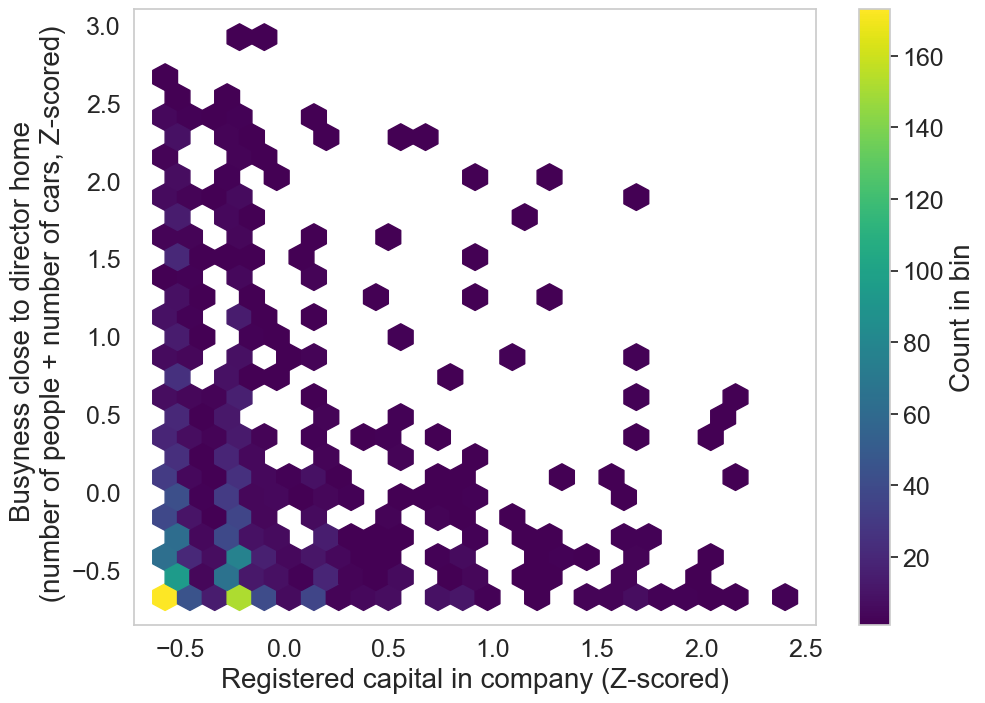

In [75]:
# Set style and figure size
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")

# Creating a hexbin plot with Viridis color palette
plt.hexbin(x=df_norm["RegisteredCapital"], y=df_norm["NumPeopleCars"], gridsize=25, cmap='viridis', mincnt=1)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Count in bin', fontsize=20)

# Set labels and title
plt.xlabel('Registered capital in company (Z-scored)', fontsize=20)
plt.ylabel('Busyness close to director home \n (number of people + number of cars, Z-scored)', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

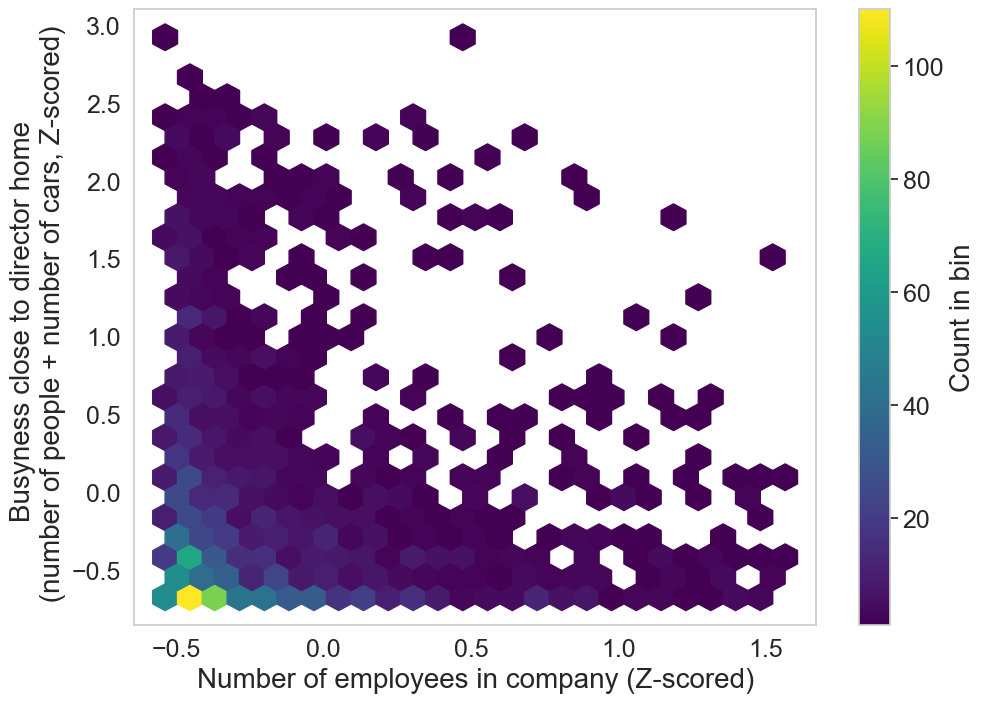

In [76]:
# Set style and figure size
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")

# Creating a hexbin plot with Viridis color palette
plt.hexbin(x=df_norm["NumEmployees"], y=df_norm["NumPeopleCars"], gridsize=25, cmap='viridis', mincnt=1)
cbar = plt.colorbar(label='Count in bin')
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Count in bin', fontsize=20)

# Set labels and title
plt.xlabel('Number of employees in company (Z-scored)', fontsize=20)
plt.ylabel('Busyness close to director home \n (number of people + number of cars, Z-scored)', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

# Violin plots

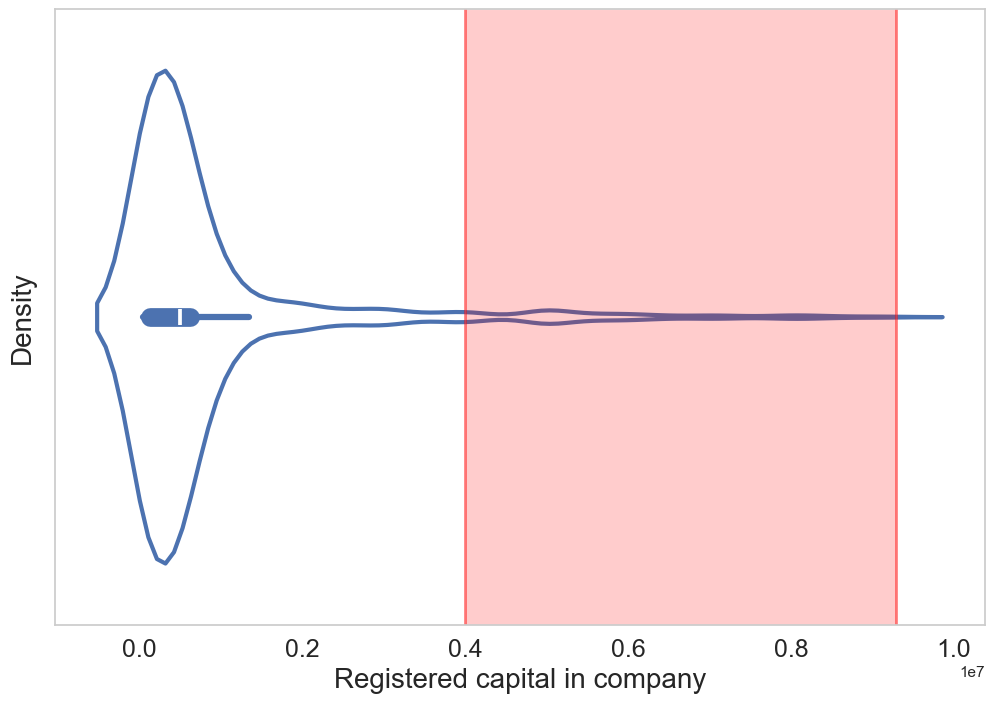

In [77]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

# Create violin plot without inner points
ax = sns.violinplot(x=df["RegisteredCapital"], linewidth=3, fill=False)

# Overlay scatter plot for points without jitter
# Assuming the data is not categorized, we place all points at x=0 (the center of the violin)
#plt.scatter( df["RegisteredCapital"], [0]*len(df["RegisteredCapital"]), color='blue', alpha=0.2)

ax.grid(False)

# Set axis labels and title
plt.xlabel('Registered capital in company', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Color a red box around the outliers
plt.axvspan(df["RegisteredCapital"].quantile(0.95), df["RegisteredCapital"].max(), facecolor='red', alpha=0.2)

# Draw line borders on the red box
plt.axvline(df["RegisteredCapital"].quantile(0.95), color='red', linewidth=2, alpha=0.5)
plt.axvline(df["RegisteredCapital"].max(), color='red', linewidth=2, alpha=0.5)

plt.show()

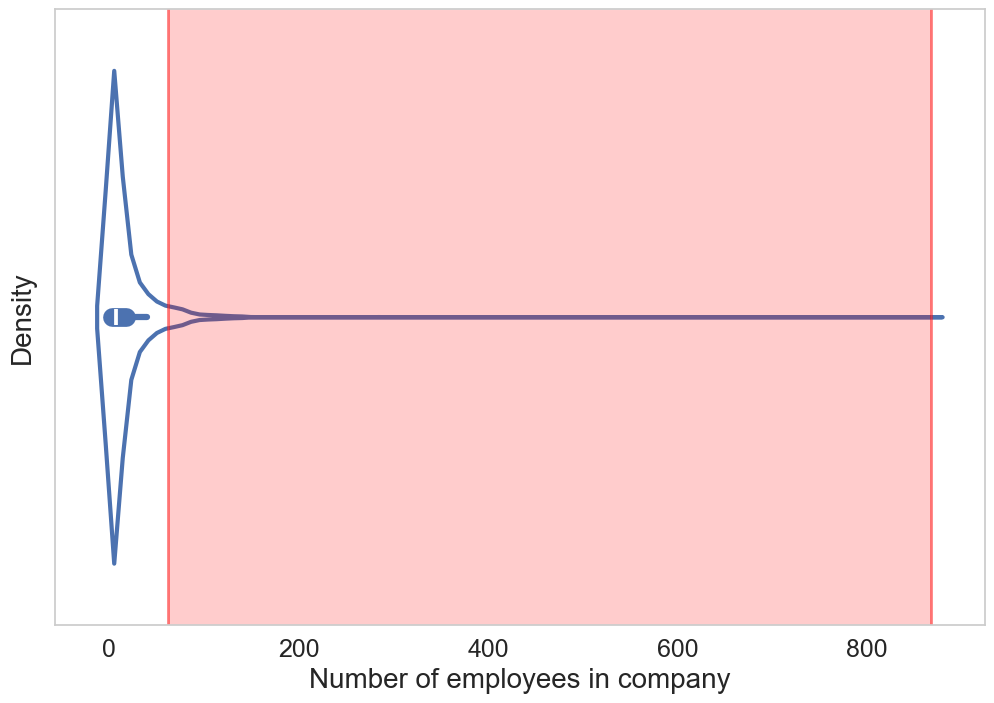

In [78]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

# Create violin plot without inner points
ax = sns.violinplot(x=df["NumEmployees"], linewidth=3, fill=False)

# Overlay scatter plot for points without jitter
# Assuming the data is not categorized, we place all points at x=0 (the center of the violin)
#plt.scatter( df["RegisteredCapital"], [0]*len(df["RegisteredCapital"]), color='blue', alpha=0.2)

ax.grid(False)

# Set axis labels and title
plt.xlabel('Number of employees in company', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

# Color a red box around the outliers
plt.axvspan(df["NumEmployees"].quantile(0.95), df["NumEmployees"].max(), facecolor='red', alpha=0.2)

# Draw line borders on the red box
plt.axvline(df["NumEmployees"].quantile(0.95), color='red', linewidth=2, alpha=0.5)
plt.axvline(df["NumEmployees"].max(), color='red', linewidth=2, alpha=0.5)

plt.show()

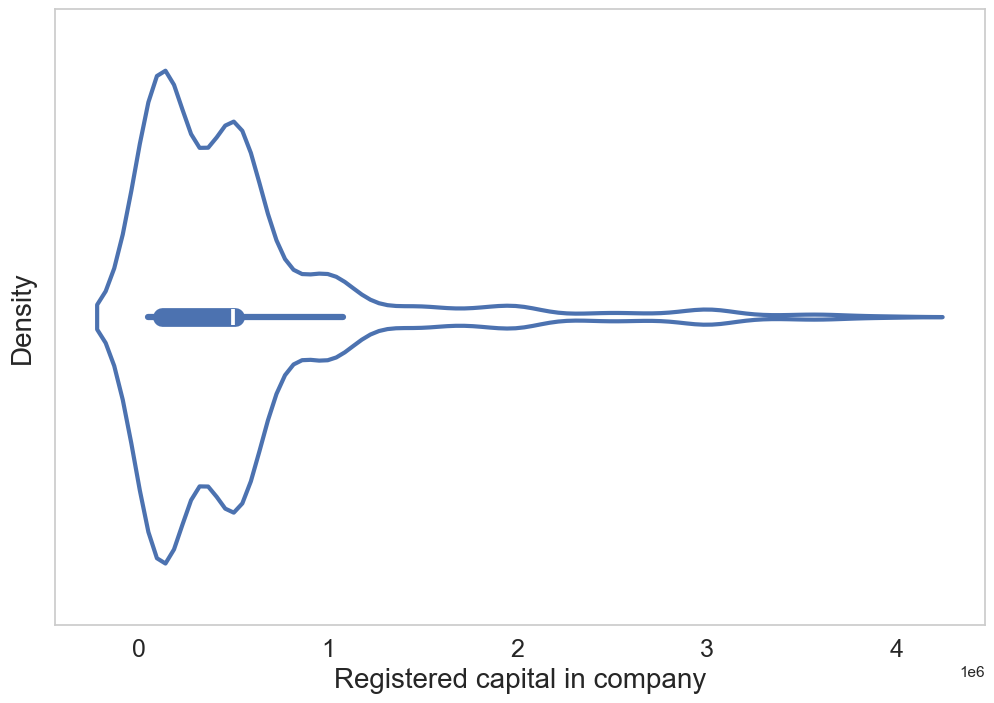

In [79]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

# Create violin plot without inner points
ax = sns.violinplot(x=df_rem["RegisteredCapital"], linewidth=3, fill=False)

# Overlay scatter plot for points without jitter
# Assuming the data is not categorized, we place all points at x=0 (the center of the violin)
#plt.scatter( df["RegisteredCapital"], [0]*len(df["RegisteredCapital"]), color='blue', alpha=0.2)

ax.grid(False)

# Set axis labels and title
plt.xlabel('Registered capital in company', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

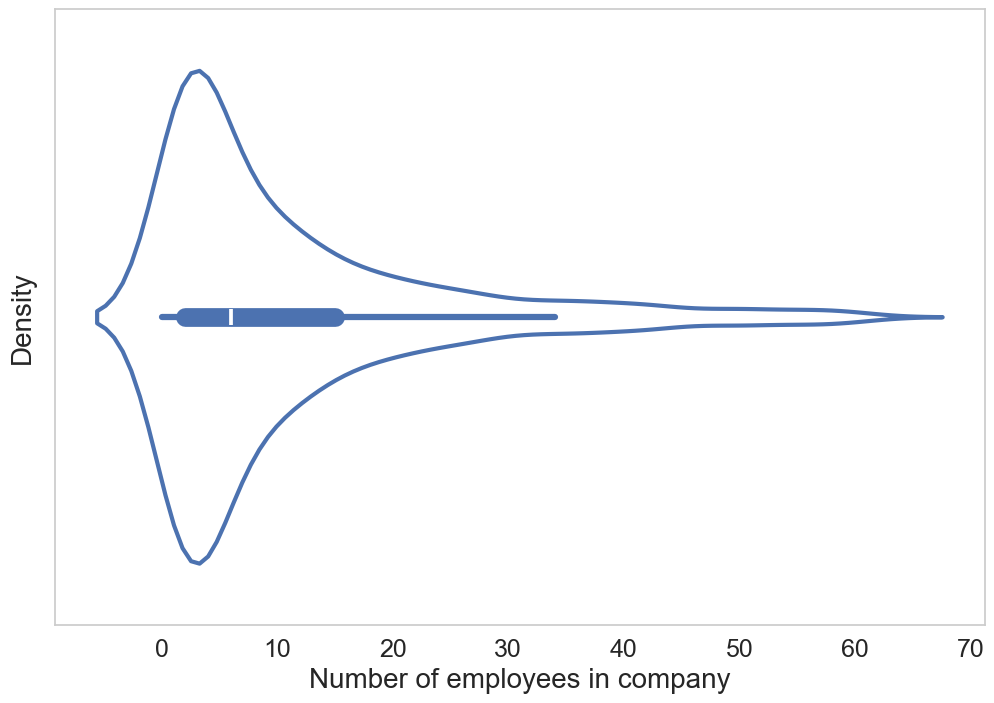

In [80]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

# Create violin plot without inner points
ax = sns.violinplot(x=df_rem["NumEmployees"], linewidth=3, fill=False)

# Overlay scatter plot for points without jitter
# Assuming the data is not categorized, we place all points at x=0 (the center of the violin)
#plt.scatter( df["RegisteredCapital"], [0]*len(df["RegisteredCapital"]), color='blue', alpha=0.2)

ax.grid(False)

# Set axis labels and title
plt.xlabel('Number of employees in company', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Increase size of axis ticks
plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()